# Librerías

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as tfkl
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import seaborn as sn
import random
import cv2


# Consigna 1 & 2

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

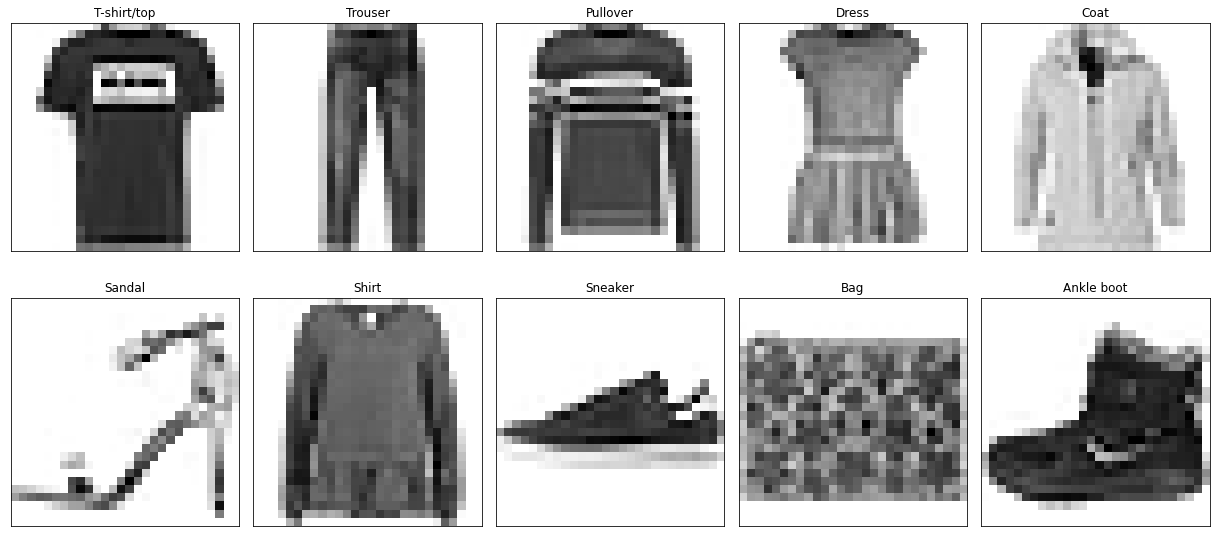

In [ ]:
plt.figure(figsize=(17,8))
for i,label_val in enumerate(np.unique(train_labels)):
  label_idxs = np.argwhere(train_labels == label_val)
  plt.subplot(2,5,i+1)
  plt.title(class_names[label_val])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(train_images[label_idxs[0]]),cmap='binary')
plt.tight_layout()

In [ ]:
len(train_images)

60000

In [ ]:
unique_train_labels = np.unique(train_labels)

for label in zip(class_names, unique_train_labels):
  label_name, label_num = label
  print(f'{label_name}: {label_num}')

T-shirt/top: 0
Trouser: 1
Pullover: 2
Dress: 3
Coat: 4
Sandal: 5
Shirt: 6
Sneaker: 7
Bag: 8
Ankle boot: 9


In [ ]:
print('Dimensiones: {}'.format(train_images[0].shape))
print('Rango: {} - {}'.format(train_images[0].min(),train_images[0].max()))

Dimensiones: (28, 28)
Rango: 0 - 255


In [ ]:
train_labels.shape

(60000,)

# Consiga 3
Separen el conjunto de desarrollo en entrenamiento y validación (20%).

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

train_images,val_images,train_labels,val_labels = train_test_split(train_images,train_labels,test_size=0.2)

In [ ]:
val_labels.shape

(12000,)

In [ ]:
train_labels.shape

(48000,)

# Consiga 4

Entrenen con los hiperparámetros por default un modelo de Boosting, uno de Bagging,un Naive Bayes y un árbol de decisión. Elijan y reporten las métricas que crean relevantes para el problema en el conjunto de validación. Justificar.

METRICAS: http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [ ]:
train_labels.shape

(48000,)

In [ ]:
train_images.shape

(48000, 28, 28)

In [ ]:
nsamples, nx, ny = train_images.shape
x_train2 = train_images.reshape((nsamples,nx*ny))

In [ ]:
nsamples, nx, ny = val_images.shape
x_val2 = val_images.reshape((nsamples,nx*ny))

In [ ]:
nsamples, nx, ny = test_images.shape
x_test2 = test_images.reshape((nsamples,nx*ny))

## Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train2, train_labels)
print("Accuracy training : {:.3f}".format(rf.score(x_train2, train_labels)))
print("Accuracy Validation: {:.3f}".format(rf.score(x_val2, val_labels)))

Accuracy training : 1.000
Accuracy Validation: 0.880


## Boosting

In [ ]:
#Se determina el max_depth=1 debido al costo computacional que nos lleva el utilizar los parametros por default

gb = GradientBoostingClassifier(max_depth=1)
gb.fit(x_train2, train_labels)
print("Accuracy training : {:.3f}".format(gb.score(x_train2, train_labels)))
print("Accuracy Validation: {:.3f}".format(gb.score(x_val2, val_labels)))

Accuracy training : 0.826
Accuracy Validation: 0.820


## Naive Bayes

In [ ]:
nb = MultinomialNB()
nb.fit(x_train2, train_labels)
print("Accuracy training : {:.3f}".format(nb.score(x_train2, train_labels)))
print("Accuracy Validation: {:.3f}".format(nb.score(x_val2, val_labels)))

Accuracy training : 0.668
Accuracy Validation: 0.659


## Árbol de decisión

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train2, train_labels)
print("Accuracy training : {:.3f}".format(clf.score(x_train2, train_labels)))
print("Accuracy Validation: {:.3f}".format(clf.score(x_val2, val_labels)))

Accuracy training : 1.000
Accuracy Validation: 0.789


# Consigna 5
Para el modelo de Random Forest:
○ Dejen todos los hiperparámetros por default y exploren el valor de n_estimators. 
○ Realice un gráfico donde se vea el rendimiento del modelo en función de n_estimators en entrenamiento y validación, y el tiempo que tarda en ajustarse cada modelo. ○ En base a estos resultados, elija el mejor valor de n_estimators y decidir cuál es el valor óptimo de este hiperparámetro. 
○ Utilizando ese valor óptimo y dejándolo fijo, ahora explorar el valor de max_depth y repetir lo hecho para n_estimators. Analizar los resultados obtenidos y relacionarlos con los conceptos vistos en las clases teóricas

## Hiperparámetros por default y variación de n_estimators.

In [ ]:
list1=[]
list2=[]
list3=[]
list4=[]


for x in np.arange(1,101,10):
  rf = RandomForestClassifier(n_estimators=x, random_state=42, )
  start_time = time.time()
  rf.fit(x_train2, train_labels)
  elapsed_time = time.time() - start_time
  list1.append(rf.score(x_train2, train_labels))
  list2.append(rf.score(x_val2, val_labels))
  list3.append(elapsed_time)
  list4.append(x)

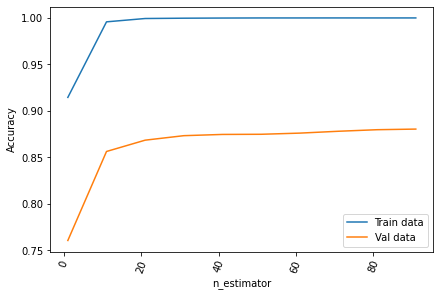

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(list4, list1, label='Train data')
ax.plot(list4, list2, label='Val data')
plt.xticks(rotation=70)

ax.set_xlabel('n_estimator')
ax.set_ylabel('Accuracy')

ax.legend()
plt.show()

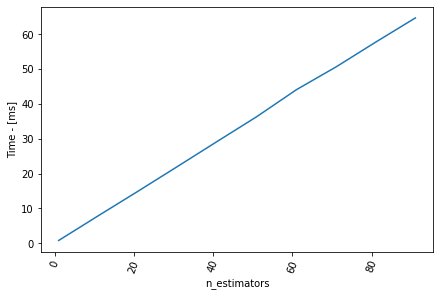

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(list4, list3)
plt.xticks(rotation=70)

ax.set_xlabel('n_estimators')
ax.set_ylabel('Time - [ms]')


plt.show()

Nos quedaríamos con n_estimators = 60

## Variación de max_depth en función del mejor n_estimators obtenido

In [ ]:
rf_list_train_max_depth = []
rf_list_test_max_depth = []
rf_list_time_max_depth = []
rf_list_n_estimators_max_depth = []

for x in np.arange(1,51,5):
  rf = RandomForestClassifier(n_estimators = 60 , max_depth = x, random_state=42, )
  start_time = time.time()
  rf.fit(x_train2, train_labels)
  elapsed_time = time.time() - start_time
  rf_list_train_max_depth.append(rf.score(x_train2, train_labels))
  rf_list_test_max_depth.append(rf.score(x_val2, val_labels))
  rf_list_time_max_depth.append(elapsed_time)
  rf_list_n_estimators_max_depth.append(x)

In [ ]:
print(rf_list_train_max_depth)
print(rf_list_test_max_depth)
print(rf_list_n_estimators_max_depth)

[0.33927083333333335, 0.8060416666666667, 0.90325, 0.9769166666666667, 0.9948333333333333, 0.9989583333333333, 0.9998958333333333, 1.0, 0.9999791666666666, 0.9999791666666666]
[0.3363333333333333, 0.8004166666666667, 0.8585, 0.87725, 0.8784166666666666, 0.8769166666666667, 0.8790833333333333, 0.876, 0.87675, 0.87675]
[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]


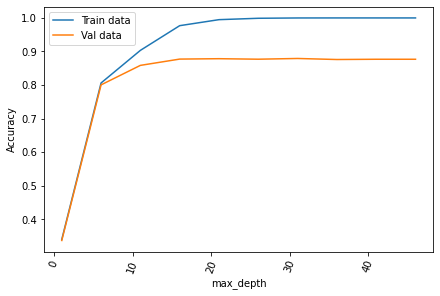

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(rf_list_n_estimators_max_depth, rf_list_train_max_depth, label='Train data')
ax.plot(rf_list_n_estimators_max_depth, rf_list_test_max_depth, label='Val data')
plt.xticks(rotation=70)

ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')

ax.legend()
plt.show()

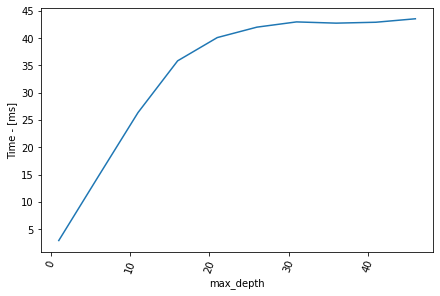

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(rf_list_n_estimators_max_depth, rf_list_time_max_depth)
plt.xticks(rotation=70)

ax.set_xlabel('max_depth')
ax.set_ylabel('Time - [ms]')

plt.show()

Resultado óptimo: max_depth = 16

# Consiga 6
Repetir el análisis del punto 5 para un modelo de Gradient Boosting Machine.

## Hiperparámetros por default y variación de n_estimators.

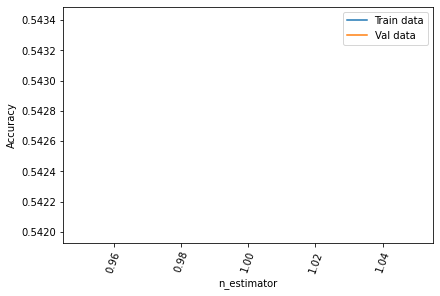

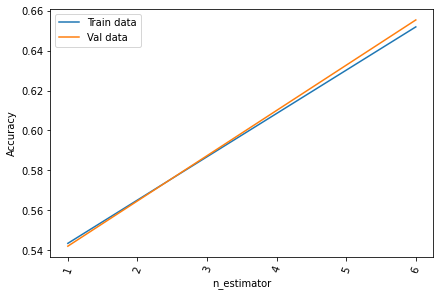

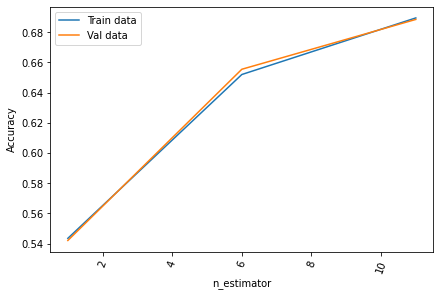

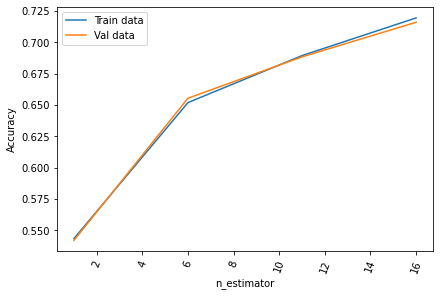

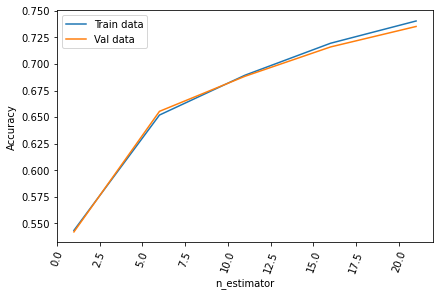

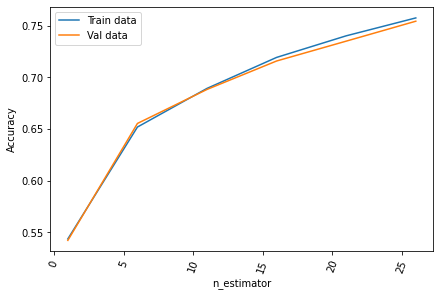

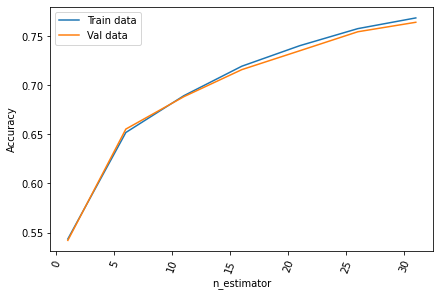

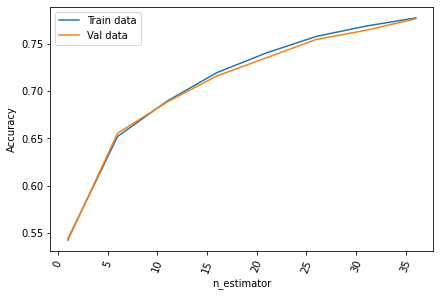

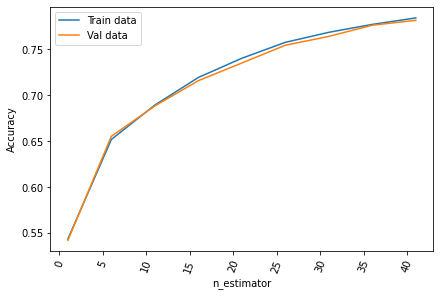

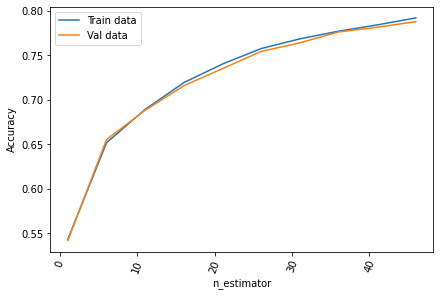

In [ ]:
gb_list_train_n_estimators=[]
gb_list_test_n_estimators=[]
gb_list_time_n_estimators=[]
gb_list_n_estimators=[]


for x in np.arange(1,51,5):
  gb = GradientBoostingClassifier(n_estimators=x, random_state=42, max_depth=1 )
  start_time = time.time()
  gb.fit(x_train2, train_labels)
  elapsed_time = time.time() - start_time
  gb_list_train_n_estimators.append(gb.score(x_train2, train_labels))
  gb_list_test_n_estimators.append(gb.score(x_val2, val_labels))
  gb_list_time_n_estimators.append(elapsed_time)
  gb_list_n_estimators.append(x)
  fig, ax = plt.subplots(constrained_layout=True)

  ax.plot(gb_list_n_estimators, gb_list_train_n_estimators, label='Train data')
  ax.plot(gb_list_n_estimators, gb_list_test_n_estimators, label='Val data')
  plt.xticks(rotation=70)

  ax.set_xlabel('n_estimator')
  ax.set_ylabel('Accuracy')

  ax.legend()
  plt.show()

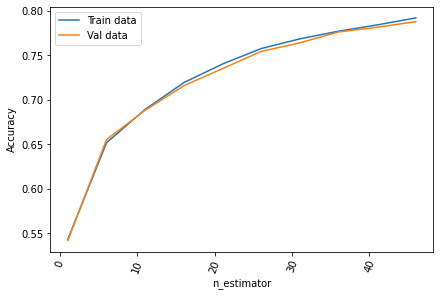

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(gb_list_n_estimators, gb_list_train_n_estimators, label='Train data')
ax.plot(gb_list_n_estimators, gb_list_test_n_estimators, label='Val data')
plt.xticks(rotation=70)

ax.set_xlabel('n_estimator')
ax.set_ylabel('Accuracy')

ax.legend()
plt.show()

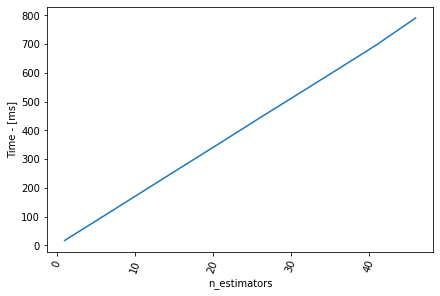

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(gb_list_n_estimators, gb_list_time_n_estimators)
plt.xticks(rotation=70)

ax.set_xlabel('n_estimators')
ax.set_ylabel('Time - [ms]')


plt.show()

Nos quedaríamos con n_estimators = 

## Variación de max_depth en función del mejor n_estimators obtenido

In [ ]:
gb_list_train_max_depth = []
gb_list_test_max_depth = []
gb_list_time_max_depth = []
gb_list_n_estimators_max_depth = []

for x in np.arange(1,3,1):
  rf = GradientBoostingClassifier(n_estimators = 50 , max_depth = x, random_state=42, )
  start_time = time.time()
  rf.fit(x_train2, train_labels)
  elapsed_time = time.time() - start_time
  gb_list_train_max_depth.append(rf.score(x_train2, train_labels))
  gb_list_test_max_depth.append(rf.score(x_val2, val_labels))
  gb_list_time_max_depth.append(elapsed_time)
  gb_list_n_estimators_max_depth.append(x)

In [ ]:
print(gb_list_train_max_depth)
print(gb_list_test_max_depth)

[0.7958958333333334, 0.8460833333333333]
[0.7935833333333333, 0.83625]


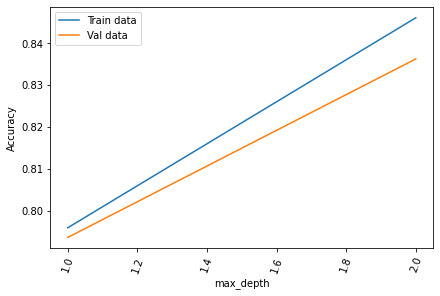

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(gb_list_n_estimators_max_depth, gb_list_train_max_depth, label='Train data')
ax.plot(gb_list_n_estimators_max_depth, gb_list_test_max_depth, label='Val data')
plt.xticks(rotation=70)

ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')

ax.legend()
plt.show()

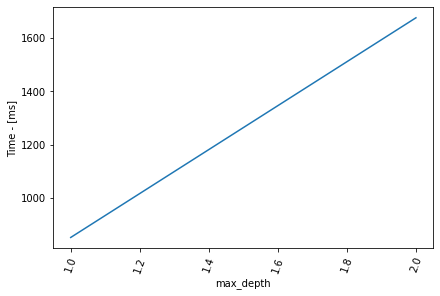

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(gb_list_n_estimators_max_depth, gb_list_time_max_depth)
plt.xticks(rotation=70)

ax.set_xlabel('max_depth')
ax.set_ylabel('Time - [ms]')

plt.show()

# Consiga 7
Para el mejor modelo de cada tipo de modelo considerado, evaluarlos en el conjunto de test. Analizar los resultados obtenidos en base a las métricas elegidas y decidir cuál fue el mejor modelo.

In [ ]:
(df_train_images, df_train_labels), (df_test_images, df_test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
nsamples, nx, ny = df_train_images.shape
df_x_train2 = df_train_images.reshape((nsamples,nx*ny))

In [ ]:
nsamples, nx, ny = df_test_images.shape
df_x_test2 = df_test_images.reshape((nsamples,nx*ny))

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=60, random_state=0, max_depth = 16)
rf.fit(df_x_train2, df_train_labels)
print("Accuracy training : {:.3f}".format(rf.score(df_x_train2, df_train_labels)))


Accuracy training : 0.974


In [ ]:
y_pred_rf = rf.predict(df_x_test2)
print("Accuracy testing : {:.3f}".format(rf.score(df_x_test2, df_test_labels)))

Accuracy testing : 0.872


In [ ]:
print('F1 score - testing: {}'.format(f1_score(df_test_labels, y_pred_rf, average='macro')))

F1 score - testing: 0.8698682369666748


## Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(n_estimators= 50, random_state=42, max_depth = 2) 
gb.fit(df_x_train2, df_train_labels)
print("Accuracy training : {:.3f}".format(gb.score(df_x_train2, df_train_labels)))


Accuracy training : 0.844


In [ ]:
y_pred_gb = gb.predict(df_x_test2)
print("Accuracy testing : {:.3f}".format(gb.score(df_x_test2, df_test_labels)))

Accuracy testing : 0.830


# Consiga 8
Reportar la matriz de confusión del mejor modelo obtenido, y analizarla.

Text(33.0, 0.5, 'True')

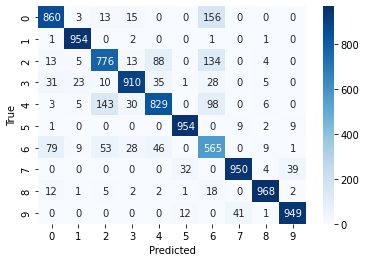

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_pred_rf, df_test_labels)
sn.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df_test_labels, y_pred_rf, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.75      0.78      0.76      1000
       Dress       0.87      0.91      0.89      1000
        Coat       0.74      0.83      0.78      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.72      0.56      0.63      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.96      0.97      0.96      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Consiga 9
Queremos analizar qué tan estable es el modelo a imágenes con ruido o imágenes de otras fuentes que no estén tan curadas como el dataset considerado. Se proponen 2 formas de realizar el análisis: ○ Alterar de manera sintética los datos de evaluación y analizar el desempeño ante estos nuevos datos alterados. Por ejemplo, se puede agregar ruido a las imágenes, borrar píxeles (hacer que valgan 0), rotarlas, cambiar el brillo y contraste, etc. (Elija alguna de esas técnicas u otra que se les ocurra) ○ Generar nuevos datos tomando imágenes de ropa (fotos, descargas, etc.) y analizar si se equivoca el modelo. Para esto, deberán darle a las imágenes el formato esperado por el modelo. Pueden elegir una sola clase del dataset (por ejemplo, zapatos), y centrar el análisis en ella. Elegir al menos una de las dos alternativas propuestas y evaluar el modelo en estas instancias nuevas. ¿Qué conclusiones puede sacar de estos resultados?

In [ ]:
#Rotate Image
def rotate_img(img, rot_deg):
    rows,cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),rot_deg,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    return dst

In [ ]:
rotated_test = np.empty((0,0,0 ), int)

for img in test_images:
  rotated_test = np.append(rotated_test,rotate_img(img, 90))


ntestsamples, ntestx, ntesty = test_images.shape

print(test_images.shape)
print(rotated_test.shape)

rotated_test_reshaped = rotated_test.reshape(ntestsamples,ntestx,ntesty)
rotated_test_reshaped.shape

(10000, 28, 28)
(7840000,)


(10000, 28, 28)

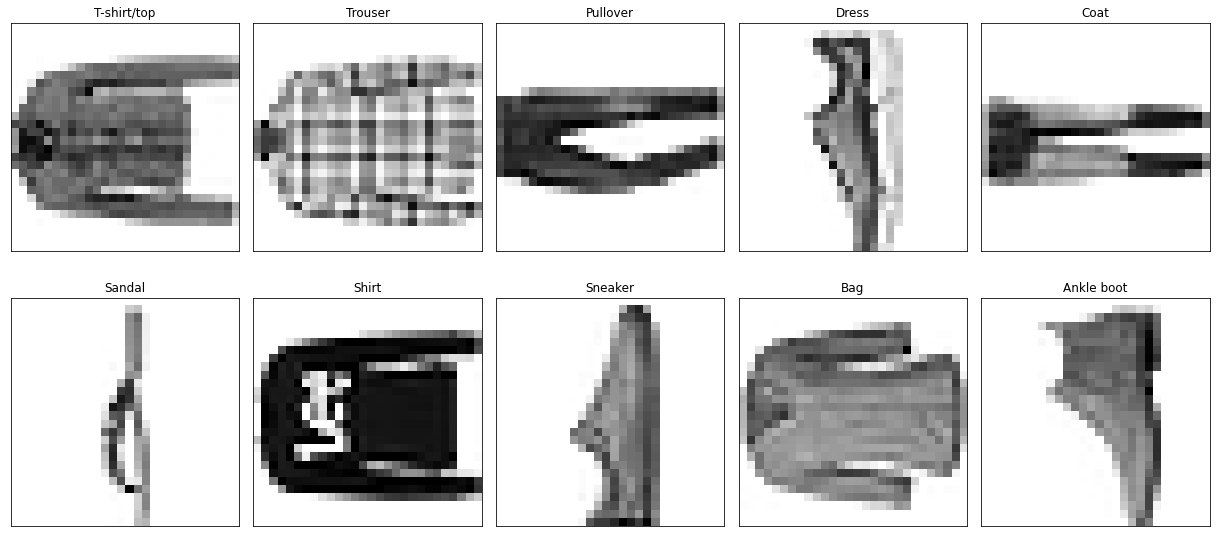

In [ ]:
plt.figure(figsize=(17,8))
for i,label_val in enumerate(np.unique(test_labels)):
  label_idxs = np.argwhere(train_labels == label_val)
  plt.subplot(2,5,i+1)
  plt.title(class_names[label_val])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(rotated_test_reshaped[label_idxs[0]]),cmap='binary')
plt.tight_layout()

In [ ]:
ntestsamples_rotated, ntestx_rotated, ntesty_rotated = rotated_test_reshaped.shape
x_test_reshaped_rotated = rotated_test_reshaped.reshape((ntestsamples_rotated,ntestx_rotated*ntesty_rotated))

In [ ]:
print("Accuracy Test: {:.3f}".format(rf.score(x_test2, test_labels)))
print("Accuracy Rotated Test: {:.3f}".format(rf.score(x_test_reshaped_rotated, test_labels)))

Accuracy Test: 0.872
Accuracy Rotated Test: 0.051


In [ ]:
num_pix_off = 50

#Turn off random n pix from an image
def turn_off_n_pix(img,n_pix):
  for i in range (0,n_pix):
    x = random.randint(0, 27)
    y = random.randint(0, 27)
    img[x][y] = 0
  return img

test_turn_off_pix = np.empty((0,0,0 ), int)

for img in np.copy(test_images):
  test_turn_off_pix = np.append(test_turn_off_pix,turn_off_n_pix(img, num_pix_off))

test_turn_off_pix.shape


(7840000,)

In [ ]:
ntestsamples_pixoff, ntestx_pixoff, ntesty_pixoff = rotated_test_reshaped.shape

test_turn_off_pix_reshaped = test_turn_off_pix.reshape(ntestsamples_pixoff,ntestx_pixoff,ntesty_pixoff)
test_turn_off_pix_reshaped.shape

(10000, 28, 28)

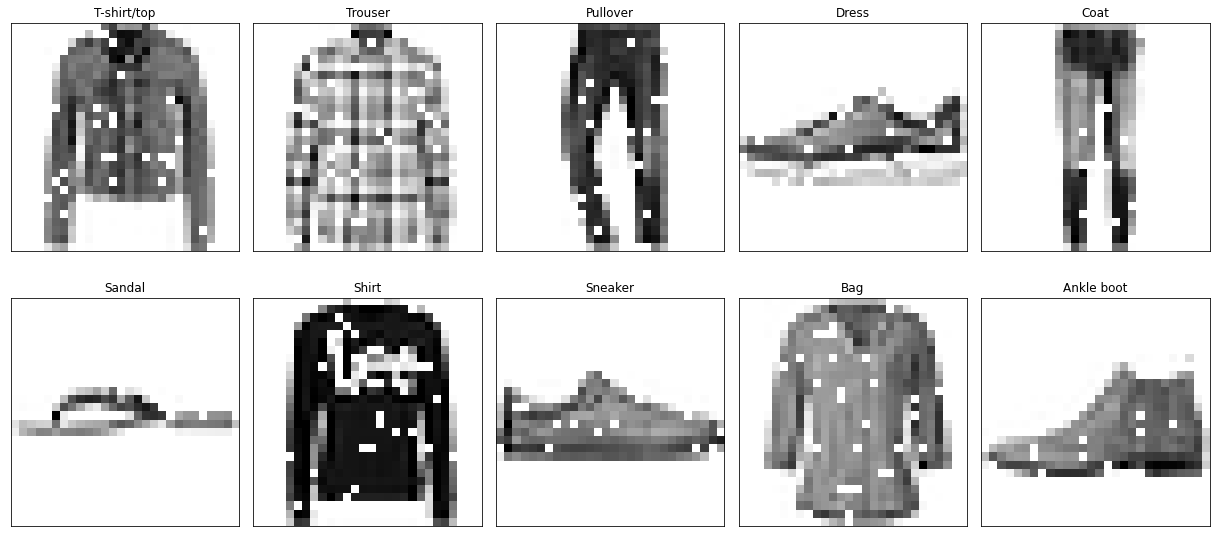

In [ ]:
plt.figure(figsize=(17,8))
for i,label_val in enumerate(np.unique(test_labels)):
  label_idxs = np.argwhere(train_labels == label_val)
  plt.subplot(2,5,i+1)
  plt.title(class_names[label_val])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(test_turn_off_pix_reshaped[label_idxs[0]]),cmap='binary')
plt.tight_layout()

In [ ]:
x_test_turn_off_pix_reshaped_2 = test_turn_off_pix_reshaped.reshape((ntestsamples_pixoff,ntestx_pixoff*ntesty_pixoff))

print("Accuracy Test: {:.3f}".format(rf.score(x_test2, test_labels)))
print("Accuracy {:d} PIX OFF  Test: {:.3f}".format(num_pix_off, rf.score(x_test_turn_off_pix_reshaped_2, test_labels)))

Accuracy Test: 0.872
Accuracy 50 PIX OFF  Test: 0.864


###Ejercicio Opcional
Hay muchos otros modelos que podemos llegar a considerar adecuados para este problema, entre ellos redes neuronales o modelos de Boosting más sofisticados. Elijan un nuevo modelo de los siguientes:
 
*   Redes neuronales: Multilayer perceptron o ConvNets
*  Boosting: XGBoost, LightGBM o CatBoost

In [ ]:
#!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold, RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import ParameterGrid
import multiprocessing
import lightgbm as lgbm
from lightgbm import LGBMClassifier
import time

param_grid = {"boosting_type" : ["gbdt", "dart"],
                "num_leaves": np.arange(2, 300, 5),
                "max_depth": np.arange(1,10,1),
                "learning_rate": np.arange(0.005,1.05,0.005),
                "n_estimators": [50, 70, 100, 150],
                "objective": ["multiclass"],
                "importance_type":["gain"]}
                
grid_val = RandomizedSearchCV(
                        estimator = LGBMClassifier(random_state=1),
                        param_distributions = param_grid,
                        n_iter = 10,
                        scoring = "accuracy",
                        cv = StratifiedKFold(n_splits=3),
                        refit = True,
                        #n_jobs = 4,
                        verbose = 20,
                        return_train_score = True,
                        error_score = "raise"
                        )

start_time=time.time()
grid_val.fit(X = x_train2, y = train_labels)
print((time.time()-start_time)/60/60)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START boosting_type=gbdt, importance_type=gain, learning_rate=0.265, max_depth=5, n_estimators=70, num_leaves=287, objective=multiclass
[CV 1/3; 1/10] END boosting_type=gbdt, importance_type=gain, learning_rate=0.265, max_depth=5, n_estimators=70, num_leaves=287, objective=multiclass;, score=(train=0.989, test=0.888) total time= 2.3min
[CV 2/3; 1/10] START boosting_type=gbdt, importance_type=gain, learning_rate=0.265, max_depth=5, n_estimators=70, num_leaves=287, objective=multiclass
[CV 2/3; 1/10] END boosting_type=gbdt, importance_type=gain, learning_rate=0.265, max_depth=5, n_estimators=70, num_leaves=287, objective=multiclass;, score=(train=0.989, test=0.889) total time= 1.8min
[CV 3/3; 1/10] START boosting_type=gbdt, importance_type=gain, learning_rate=0.265, max_depth=5, n_estimators=70, num_leaves=287, objective=multiclass
[CV 3/3; 1/10] END boosting_type=gbdt, importance_type=gain, learning_rate=0.265, 

In [ ]:
print('Mejores hiperparametros encontrados (cv)')
print(grid_val.best_params_, ':', grid_val.best_score_, grid_val.scoring)

Mejores hiperparametros encontrados (cv)
{'objective': 'multiclass', 'num_leaves': 62, 'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.28, 'importance_type': 'gain', 'boosting_type': 'dart'} : 0.8968541666666666 accuracy


In [ ]:
### Cambiar el arbol al que corresponde
lgbm = LGBMClassifier(boosting_type = "dart",
                        num_leaves = 297,
                        max_depth = 3,
                        learning_rate = 0.385 ,
                        n_estimators = 100,
                        objective = "multiclass",
                        importance_type = 'gain')
                        

In [ ]:
lgbm.fit(x_train2,train_labels)
print("Accuracy training : {:.3f}".format(lgbm.score(x_train2, train_labels)))
print("Accuracy Validation: {:.3f}".format(lgbm.score(x_val2, val_labels)))

Accuracy training : 0.912
Accuracy Validation: 0.877


In [ ]:
(df_train_images, df_train_labels), (df_test_images, df_test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
nsamples, nx, ny = df_train_images.shape
df_x_train2 = df_train_images.reshape((nsamples,nx*ny))
nsamples, nx, ny = df_test_images.shape
df_x_test2 = df_test_images.reshape((nsamples,nx*ny))

In [ ]:
y_pred_lgbm = lgbm.predict(df_x_test2)
print("Accuracy testing : {:.3f}".format(accuracy_score(y_pred_lgbm, df_test_labels)))

Accuracy testing : 0.870
